In [1]:
%matplotlib inline 

import matplotlib
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import pandas as pd

dataframe = pd.read_csv('covid19_cases_switzerland_openzh.csv')


In [165]:
population = 8600000

S = population
E = 0
I = 80
R = 0

symptom_free_rate = 0.8

R0 = 4
incubation_days = 5.6
sick_days = 3.3
simulated_days = 50

interventions = [(23, 1.2), (100, 1.8), (200, R0)]


sigma = 1/incubation_days
gamma = 1/sick_days
beta_wo_intervention = R0 * gamma

v0 = (0, S, E, I, R)


def get_reproduction_rate(ivs, day):
    res = R0
    for intervention in ivs:
        if intervention[0] <= day:
            res = intervention[1]
    return res
        

def calculate_change(v_prev, ivs=[]):
    day, Sp, Ep, Ip, Rp = v_prev
    beta = get_reproduction_rate(ivs, day) * gamma
    
    
    infection_delta = beta * Ip * Sp / population
    sick_delta = Ep * sigma
    recovery_delta = Ip * gamma
    
    return (
        day + 1, 
        Sp - infection_delta, 
        Ep + infection_delta - sick_delta, 
        Ip + sick_delta - recovery_delta, 
        Rp + recovery_delta
    )
    

results = [v0]
for day in range(0, simulated_days):
    results.append(calculate_change(results[-1]))
  
results_with_interventions = [v0]
for day in range(0, simulated_days):
    results_with_interventions.append(calculate_change(results_with_interventions[-1], ivs=interventions))



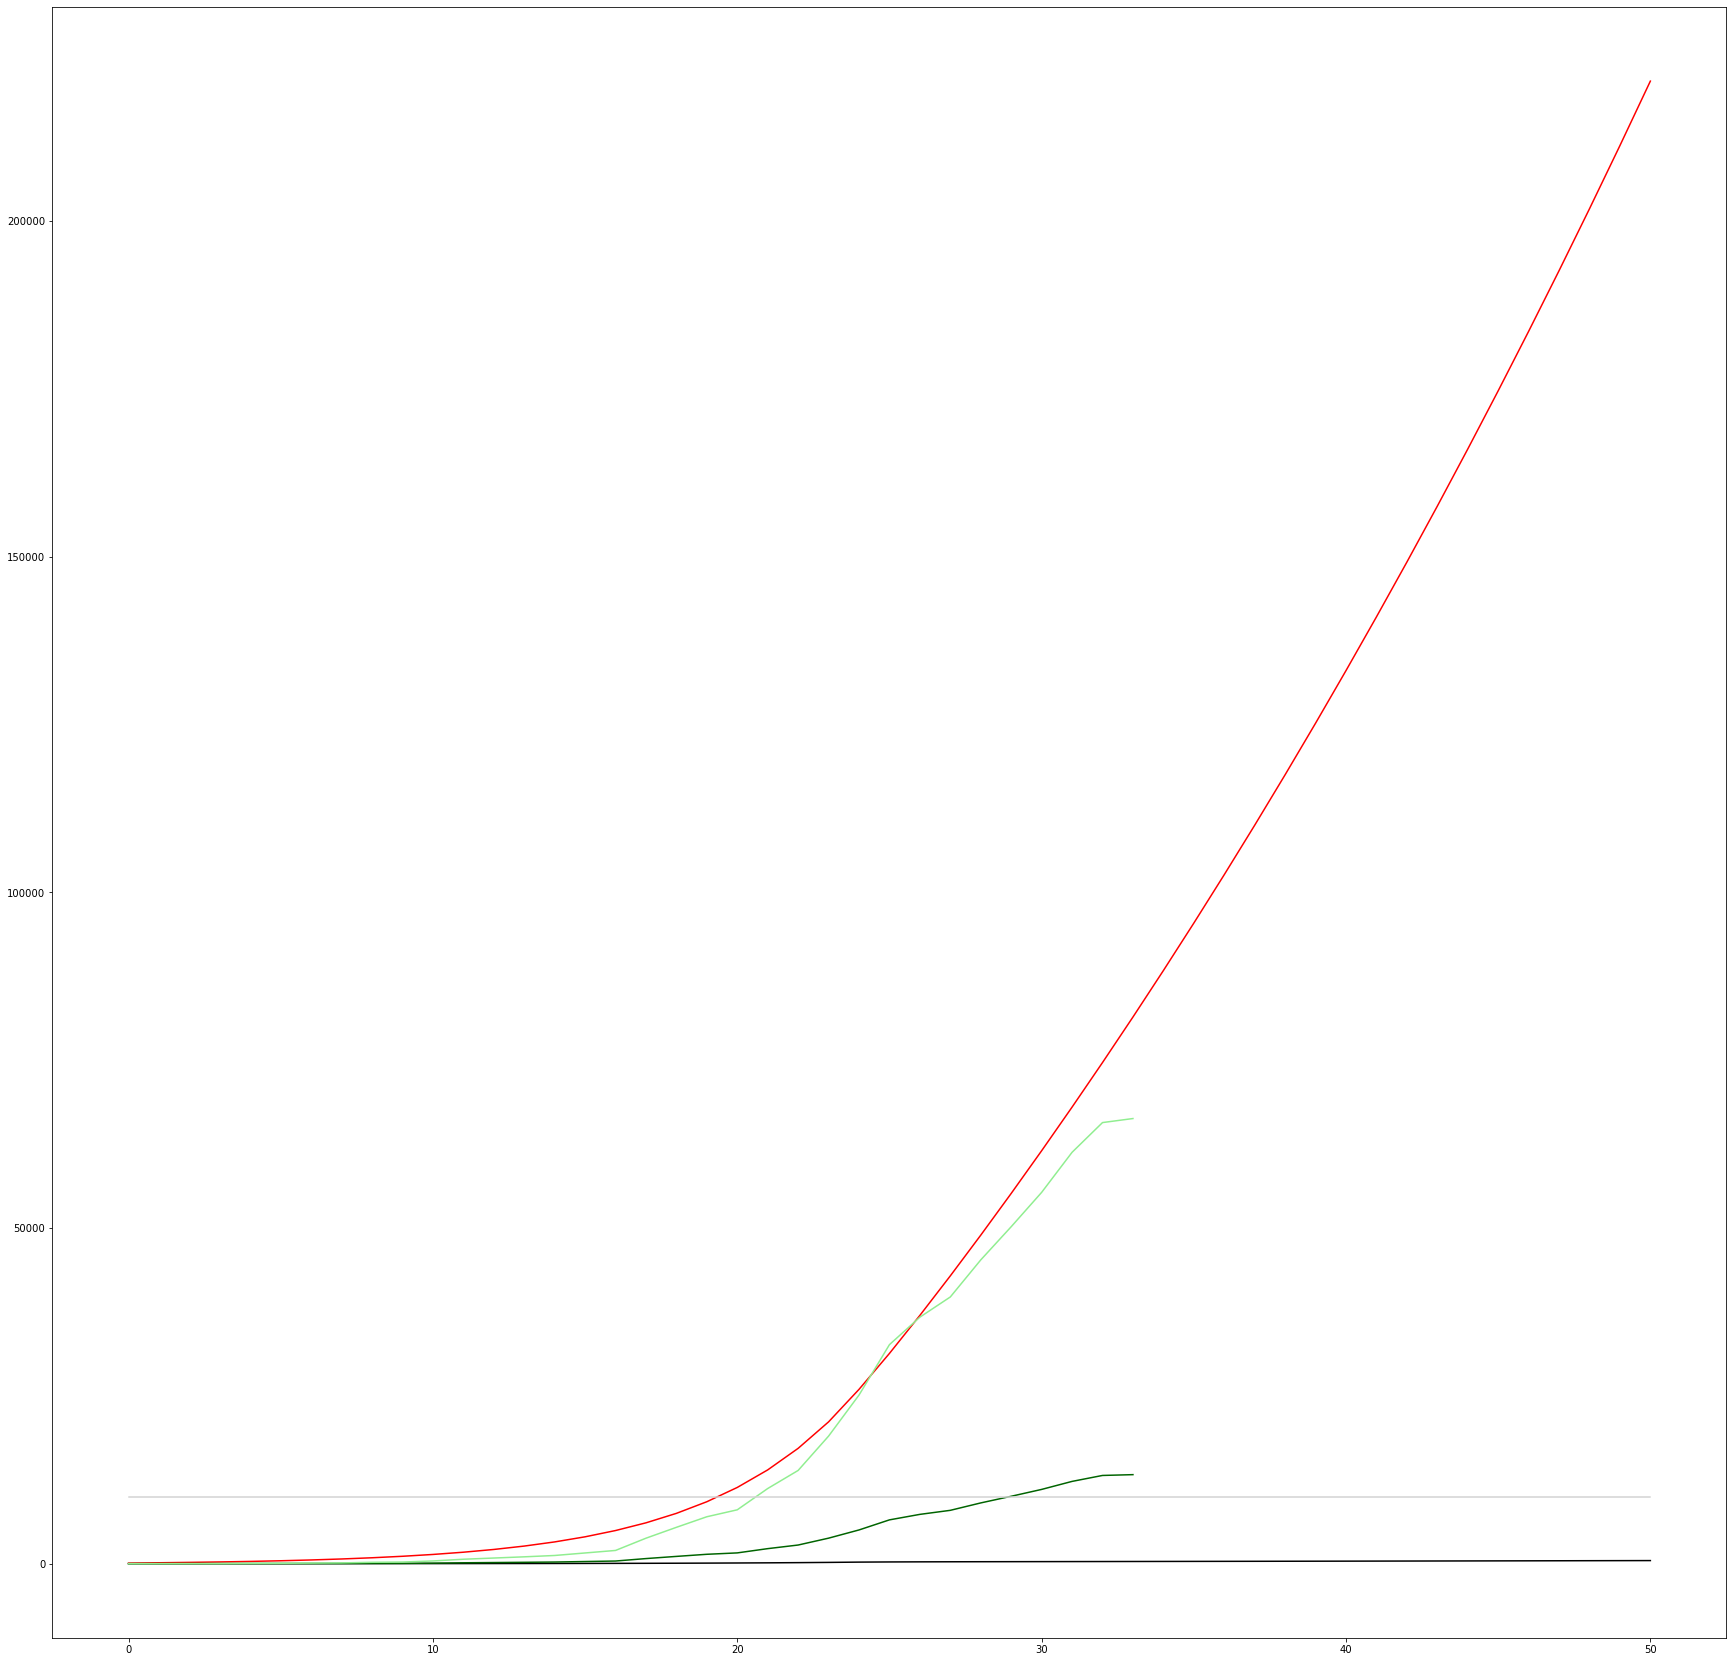

In [166]:
plt.rcParams['figure.figsize'] = [30, 30]

predicted_all_time_cases = [results[0][3]]
for number_of_cases in results[1:]:
     predicted_all_time_cases.append(number_of_cases[3] + predicted_all_time_cases[-1])
# plt.plot([r[1] for r in results])
# plt.plot([r[2] for r in results])
# plt.plot([r[3] for r in results], color='yellow')
# plt.plot(predicted_all_time_cases, color='orange')
# plt.plot([r[4] for r in results])



predicted_all_time_cases_with_intervention = [results_with_interventions[0][3]]
for number_of_cases in results_with_interventions[1:]:
     predicted_all_time_cases_with_intervention.append(number_of_cases[3] + predicted_all_time_cases_with_intervention[-1])

# plt.plot([r[3] for r in results_with_interventions], color='pink')
plt.plot(predicted_all_time_cases_with_intervention, color='red')

# plt.plot([r[4] for r in results_with_interventions])
plt.plot([r[3] * 0.8 * 0.06 for r in results_with_interventions], color='black')

offset = 1
zeros = [0] * offset

confirmed_real_cases = zeros + [int(x) for x in dataframe['CH']]
all_real_cases = [i / (1-symptom_free_rate) for i in confirmed_real_cases]


    

# cases_all_time = [0]
# for number_of_cases in all_real_cases[1:]:
#     cases_all_time.append(number_of_cases + cases_all_time[-1])

plt.plot(confirmed_real_cases, color='darkgreen')
plt.plot(all_real_cases, color='lightgreen')
# plt.plot(confirmed_cases_all_time, )
# plt.plot(cases_all_time, )

plt.plot([int(10000) for r in results], color='lightgray')